# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Read the data into Pandas

In [3]:
import pandas as pd
url = '../data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [4]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

## Split the data into training and testing sets

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
dict(zip(feature_cols, logreg.coef_[0]))

{'Parch': 0.3423921585749839, 'Pclass': -0.88188860564509608}

## Make predictions on the testing set and calculate the accuracy

In [7]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [8]:
# calculate classification accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.66816143497757852

## Compare against baseline

In [9]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.573991
Name: Survived, dtype: float64

# Diagnosing classification models: confusion matrices and ROC curves

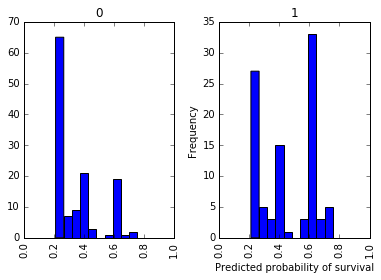

In [45]:
labels_preds = pd.DataFrame({'label': y_test, 'pred_prob': y_pred_prob})
axs = labels_preds.hist(by='label', column='pred_prob', sharex=True)
for i, ax in axs:
    plt.set_title('Survived=' + str(bool(i)))
    ax.xlim(0, 1)
    ax.xlabel('Predicted probability of survival')
    ax.ylabel('Frequency')
plt.show()

In [36]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[105  23]
 [ 51  44]]


In [37]:
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [38]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


In [39]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [40]:
# old confusion matrix, sensitivity, and specificity
print(confusion)
# calculate the sensitivity
print('Sensitivity: ', TP / float(TP + FN))
# calculate the specificity
print('Specificity: ', TN / float(TN + FP))

[[105  23]
 [ 51  44]]
Sensitivity:  0.463157894737
Specificity:  0.8203125


In [41]:
# new confusion matrix
new_confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(new_confusion)
# calculate the sensitivity
print('Sensitivity: ', new_confusion[1][1] / float(sum(new_confusion[1])))
# calculate the specificity
print('Specificity: ', new_confusion[0][0] / float(sum(new_confusion[0])))

[[72 56]
 [32 63]]
Sensitivity:  0.663157894737
Specificity:  0.5625
